## Project Insurance
#visualization

**Load insurance CSV File into df dataframe and display the first 5 rows**

In [71]:
import pandas as pd # main focus of this Notebook!

df = pd.read_csv('insurance.csv') # read into a pandas DataFrame (df)

df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Import required libraries for visualization (matplotlib and seaborn)**

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# important: ensures the visualizations will be in the Notebook
%matplotlib inline 



**Explore the dataframe: the shape of the df, the list of columns, check if there is any missing values**

In [73]:
df.shape

(1338, 7)

In [74]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [75]:
# How many missing values do we have?
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



**Generate the descriptive statistics to show count, mean, std, min, max, and etc. of age, bmi, children, and charges columns in the df dataframe**

In [76]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801




**Use matplotlib to create the histogram of age.** 

* The title should be 'Age vs. Frequency', the x axis label should be 'Age' and y axis label should be 'Frequency'.

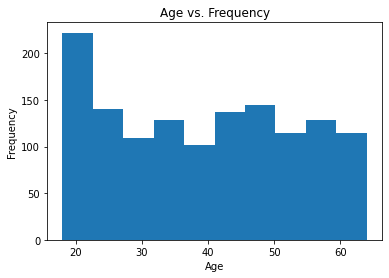

In [58]:
plt.title('Age vs. Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df['age']) # we can use dot notation instead of bracket notation
plt.show()



**Use Seaborn to create a scatter plot of age vs. charges.**

* The title should be age vs. charges.
* Put age on x-axis and charges on y-axis.

Text(0.5, 1.0, 'age vs. charges')

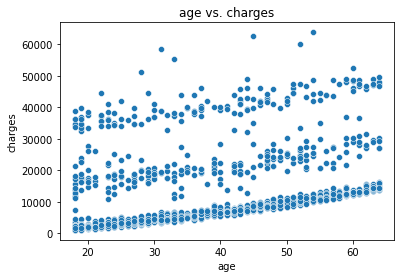

In [59]:

sns.scatterplot(x=df["age"], y=df["charges"]).set_title('age vs. charges')



**Use Seaborn to create a scatter plot of bmi vs. charges and add regression line to show strength of the relationship.** 

* The title should be bmi vs. charges
* Put bmi on x-axis and charges on y-axis

Text(0.5, 1.0, 'bmi vs. charges')

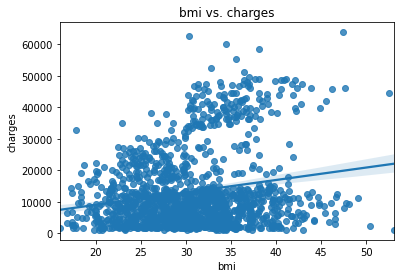

In [77]:
sns.regplot(x=df['bmi'], y=df['charges']).set_title('bmi vs. charges')




**Use Seaborn to create a scatter plot of bmi vs. charges.**

* Change the color of dots by 'smoker' column.
* Put bmi on x-axis and charges on y-axis
* The title should be bmi vs. charges. 
* Create your own palette: yes should be red, no should be green

Text(0.5, 1.0, 'bmi vs. charges')

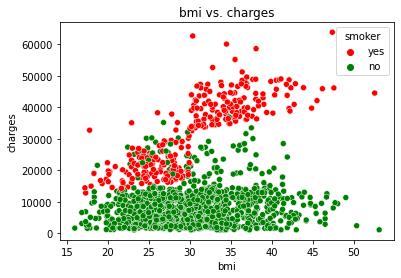

In [61]:
palette1 ={"yes": "red", "no": "green"}

sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'], palette=palette1).set_title('bmi vs. charges')



**Use seaborn to create a scatter plot of bmi vs. charges for only females.**

* Change the color of dots by 'smoker' column.
* Put bmi on x-axis and charges on y-axis
* The title should be 'bmi vs. charges for female'. 
* create your own palette: yes should be Red, no should be green

Text(0.5, 1.0, 'bmi vs. charges')

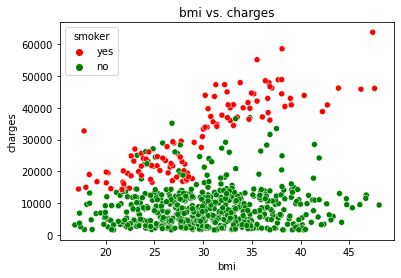

In [78]:
palette1 ={"yes": "red", "no": "green"}

df1=df.loc[(df['sex']=='female')].copy()

sns.scatterplot(x=df1['bmi'], y=df1['charges'], hue=df1['smoker'], palette=palette1).set_title('bmi vs. charges')



**Use plot() function to create a bar chart to show the number of people from smoker group and the number of people from non-smoker group.**

* The title should be 'Smoker vs. Frequency', the x axis label should be 'Smoker' and y axis label should be 'Frequency'** 
* Use seaborn's 'Set1' palette for the color

<AxesSubplot:title={'center':'smoker vs. Frequency'}, xlabel='smoker', ylabel='Frequency'>

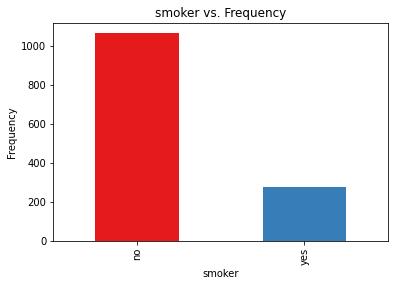

In [46]:
plt.title('Smoker vs. Frequency')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

df['smoker'].value_counts().plot(kind='bar', color=sns.color_palette('Set1'))

**Use matplotlib to create a pie chart to show the percentage of smoker people and the percentage of non-smoker people. Slices should have labels**.

* The title should be 'Percentage of people in each group'.
* Make one of the slices of the pie chart to stand out by explode.

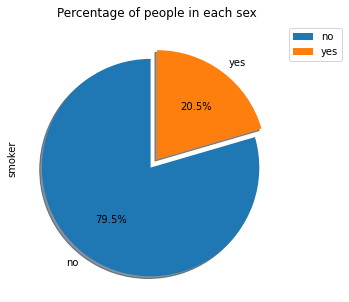

In [64]:
plt.title('Percentage of people in each group')
explode_list = [0.1, 0] # ratio for each region with which to offset each wedge.

df['smoker'].value_counts().plot(kind='pie',
                            figsize=(5, 5),
                            autopct='%0.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            explode=explode_list # 'explode' lowest 3 continents
                          
                            )

# add legend
plt.legend(df['smoker'].value_counts().index, bbox_to_anchor=(1.2,1))

# you can make changes to bbox_to_anchor=(1.2,1) to adjust the location of the legend

plt.show()

**Use Seaborn to create a countplot to show number of people in each region.**

* The title should be 'Number of people in each region'.
* Change the color with sex
* region should be on x-axis
* Put the legend on upper right of the chart.

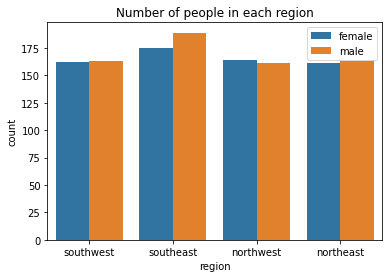

In [83]:

sns.countplot(x='region', hue='sex', data=df).set_title('Number of people in each region')
plt.legend(loc='upper right')

**Use matplotlib to create a line plot to show average charges for different ages.**

* Title should be 'age vs. average charges', x-label should be 'age', and y-label should be 'average charges'

Text(0, 0.5, 'average charges')

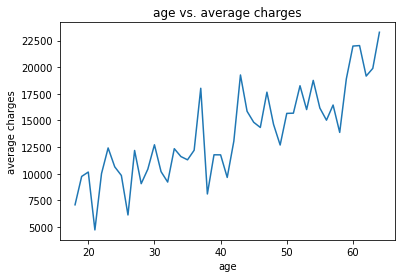

In [84]:
df['charges'].groupby(df['age']).mean().plot(kind='line')
plt.title('age vs. average charges')
plt.xlabel('age')
plt.ylabel('average charges')

**Use Seaborn to create a line plot to show average charges for different ages.**

* Title should be 'age vs. average charges for each smoker group'
* Change the color of line with smoker column.
* Age should be on x-axis. charges should be on y-axis.
* show the legend on the upper right of the chart

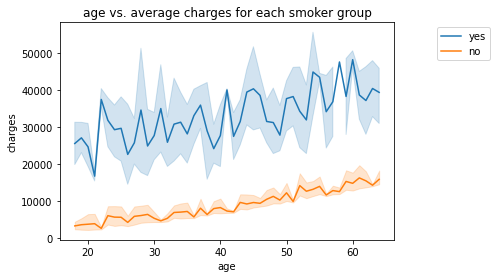

In [86]:
sns.lineplot(x=df['age'], y=df['charges'], hue=df['smoker'], estimator='mean').set_title('age vs. average charges for each smoker group')
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))

**Use matplotlib to create a bar chart to show average charges for smoker group and and average charges for non-smoker group.**

* The title should be 'average charges for each group', the x axis label should be 'smoker' and y axis label should be 'average charges'
* Use seaborn's 'Set1' palette for the color
* Sort it in ascending order

<AxesSubplot:title={'center':'average charges for each group'}, xlabel='smoker', ylabel='average charges'>

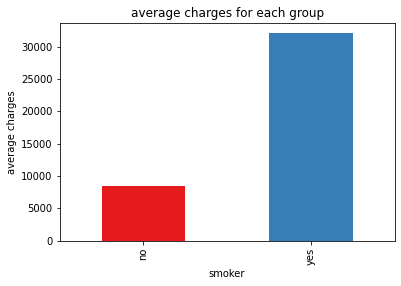

In [69]:
plt.title('average charges for each group')
plt.xlabel('smoker')
plt.ylabel('average charges')


ax=df['charges'].groupby(df['smoker']).mean().sort_values(ascending=True)


ax.plot(kind='bar', color=sns.color_palette("Set1")) # I used seaborn color palette



**Use matplotlib to create a bar chart to show average charges for each sex in southeast and southwest regions .**

* The title should be 'average charges for each sex in southeast and southwest regions', the x axis label should be 'sex' and y axis label should be 'average charges'
* Use seaborn's 'Set1' palette for the color
* Sort it in descending order

<AxesSubplot:title={'center':'average charges for each sex in southeast and southwest regions'}, xlabel='sex', ylabel='Average charges'>

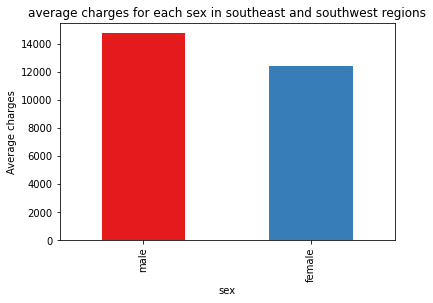

In [82]:
plt.title('average charges for each sex in southeast and southwest regions')
plt.xlabel('sex')
plt.ylabel('Average charges')

df1=df.loc[(df['region']=='southeast')|(df['region']=='southwest')].copy()
ax=df1['charges'].groupby(df1['sex']).mean().sort_values(ascending=False)

ax.plot(kind='bar', color=sns.color_palette("Set1"))